#Ant Colony Optimization


Pheromone:
[[0.   1.86 0.06 0.03 0.26 0.5  0.19 0.   0.   0.   0.   0.   0.   0.
  0.07]
 [0.   0.   0.   0.37 0.09 0.04 0.   0.6  0.   0.22 0.99 0.14 0.03 0.
  0.48]
 [0.27 0.   0.   0.17 0.17 0.   0.   0.47 0.04 0.   0.   0.09 0.   1.45
  0.31]
 [0.16 0.   0.15 0.   0.44 0.   0.35 0.02 0.01 0.   0.13 0.23 1.13 0.01
  0.33]
 [0.   0.   0.   0.01 0.   0.   0.   0.35 0.   2.49 0.   0.12 0.   0.
  0.  ]
 [1.26 0.   0.   0.   0.   0.   0.   0.   0.   0.22 0.16 0.04 0.01 1.27
  0.02]
 [0.04 0.01 0.   0.02 0.04 0.04 0.   0.   2.57 0.   0.   0.03 0.02 0.
  0.21]
 [0.29 0.52 0.   0.51 0.75 0.   0.   0.   0.   0.   0.   0.05 0.75 0.
  0.1 ]
 [0.   0.25 2.6  0.   0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.
  0.09]
 [0.07 0.   0.04 0.36 0.1  0.   0.02 0.   0.19 0.   0.   0.   0.81 0.19
  1.18]
 [0.76 0.   0.04 0.39 0.   0.   0.   1.49 0.   0.   0.   0.   0.13 0.
  0.16]
 [0.   0.09 0.01 0.37 0.   2.03 0.   0.   0.01 0.   0.38 0.   0.   0.05
  0.02]
 [0.   0.   0.   0.45 0.33 0.22 0.19 0.01 

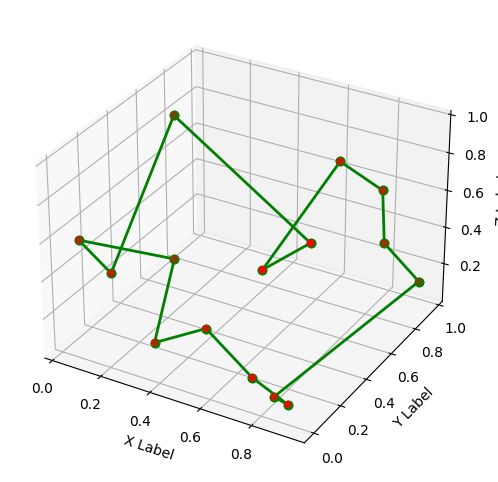

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Calculates Euclidean distance between 2 pts
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))



def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):

    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf

    for iteration in range(n_iterations):

        paths = []
        path_lengths = []

        for ant in range(n_ants):

            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0

            while False in visited:

                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                for i, unvisited_point in enumerate(unvisited):

                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta


                probabilities /= np.sum(probabilities)

                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point

            paths.append(path)
            path_lengths.append(path_length)


            if path_length < best_path_length:

                best_path = path
                best_path_length = path_length

        pheromone *= evaporation_rate

        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):

                pheromone[path[i], path[i+1]] += Q/path_length

            pheromone[path[-1], path[0]] += Q/path_length

    print(f'\nPheromone:\n{np.array_str(pheromone, precision=2, suppress_small=True)}\n\n')

    print(f'\nPoints:\n{np.array_str(points, precision=2, suppress_small=True)}\n\n')

    print(f'\nPath chosen: {path}\n')
    print(f'\nBest Path: {best_path}\n\n')




    # Plotting
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')

    for i in range(n_points-1):

        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')


    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()



# Example usage:
points = np.random.rand(15, 3) # Generate n random 3D points

ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)